In [1]:
# Listing 4.1: Loading the IMDB dataset

from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [2]:
#train_data[0]

In [3]:
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
# Listing 4.2 Decoding reviews back to text

word_index = imdb.get_word_index() #word_index is a dictionary mapping words to an integer index
reverse_word_index = dict(
        [(value, key) for (key, value) in word_index.items()]) # Reverses it, mapping integer indices to words
decoded_review = " ".join(
        [reverse_word_index.get(i - 3, "?") for i in train_data[0]]) # Decodes the review. Note that the indices 
                                                                     # are offset by 3 because 0, 1 and 2 are reserved 
                                                                     # indices for "padding," "start of sequence, and
                                                                     # "unknown." 

In [6]:
# Listing 4.3 - Encoding the integer sequences via multi-hot encoding

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) # Creates an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1. # Sets specific indices of results[i] to 1s
        return results

x_train = vectorize_sequences(train_data) # vectorized training data
x_test = vectorize_sequences(test_data) # vectorized test data

x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [7]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [8]:
# Listing 4.4 - Model Definition 

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers.legacy import Adam # currently needed to make things work

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# output = relu(dot(input, W) + b)

Metal device set to: Apple M1 Pro


In [9]:
# Listing 4.5 - Compiling the model

model.compile(optimizer = "rmsprop", 
             loss = "binary_crossentropy", 
             metrics = ["accuracy"])

In [10]:
# Listing 4.6 - Setting aside a validation set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [11]:
# Listing 4.7 - Training the model

history = model.fit(partial_x_train, 
                    partial_y_train, 
                   epochs=100, 
                   batch_size=512, 
                   validation_data=(x_val, y_val))

Epoch 1/100


2023-08-07 17:39:18.095991: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


30/30 [==============================] - 1s 28ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 2/100
30/30 [==============================] - 0s 14ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 3/100
30/30 [==============================] - 0s 13ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 4/100
30/30 [==============================] - 0s 14ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 5/100
30/30 [==============================] - 0s 13ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 6/100
30/30 [==============================] - 0s 13ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 7/100
30/30 [==============================] - 0s 13ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 8/100
30/30 

30/30 [==============================] - 0s 16ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6933 - val_accuracy: 0.4947
Epoch 59/100
30/30 [==============================] - 0s 16ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6933 - val_accuracy: 0.4947
Epoch 60/100
30/30 [==============================] - 0s 14ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 61/100
30/30 [==============================] - 0s 13ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 62/100
30/30 [==============================] - 0s 13ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 63/100
30/30 [==============================] - 0s 13ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 64/100
30/30 [==============================] - 0s 13ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 65/100

In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

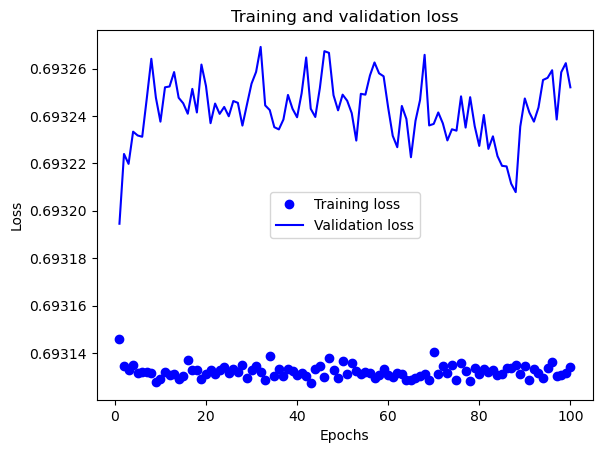

In [13]:
# Listing 4.8 - Plotting the training and validation loss

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

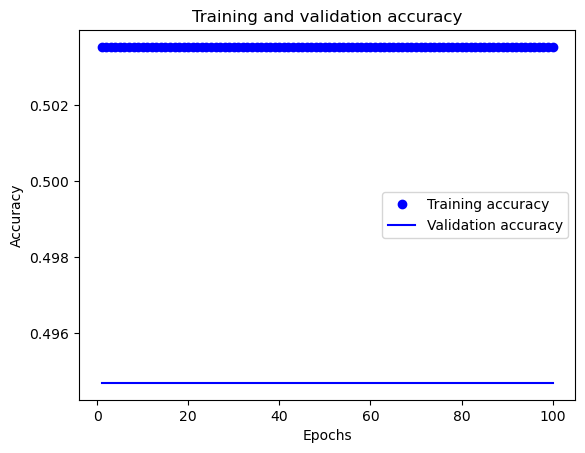

In [14]:
# Listing 4.9 - Plotting the training and validation accuracy

plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [15]:
# Listing 4.10 - Retraining a model from scratch

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer = "rmsprop", 
             loss = "binary_crossentropy", 
             metrics = ["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
49/49 [==============================] - 1s 11ms/step - loss: 0.6932 - accuracy: 0.4958
Epoch 2/4
49/49 [==============================] - 0s 10ms/step - loss: 0.6932 - accuracy: 0.4999
Epoch 3/4
49/49 [==============================] - 0s 10ms/step - loss: 0.6931 - accuracy: 0.4989
Epoch 4/4
782/782 [==============================] - 4s 5ms/step - loss: 0.6931 - accuracy: 0.5000


[0.6931489706039429, 0.5]

In [16]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.5172317],
       [0.5004863],
       [0.5004863],
       ...,
       [0.5004863],
       [0.5004863],
       [0.5004863]], dtype=float32)

In [17]:
model = keras.Sequential([
    layers.Dense(256, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer = "rmsprop", 
             loss = "binary_crossentropy", 
             metrics = ["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
49/49 [==============================] - 1s 17ms/step - loss: 0.6932 - accuracy: 0.4954
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.6932 - accuracy: 0.4963
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.6931 - accuracy: 0.4965
Epoch 4/4
782/782 [==============================] - 4s 4ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6931770443916321, 0.5]

In [18]:
model.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.76129836],
       [0.50041676],
       [0.50041676],
       ...,
       [0.50041676],
       [0.50041676],
       [0.50041676]], dtype=float32)

In [19]:
### Multiclass classification
# LIsting 4.11 - Loading the Reuters Dataset

from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [20]:
len(train_data)

8982

In [21]:
len(test_data)

2246

In [22]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [23]:
# Listing 4.12 - Decoding newswired back to text

word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]) #Notice that the indices are offset by 3 
                                                                 #because 0, 1, and 2 are reserved indices for 
                                                                 #"padding," "start of sequence," and "unknown" 

In [24]:
train_labels[10]

3

In [25]:
# Listing 4.13 - Encoding the input data

x_train = vectorize_sequences(train_data) # vectorized training data
x_test = vectorize_sequences(test_data)   # vectorized test data

In [26]:
# Listing 4.14 - Encoding the labels

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [27]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"), 
    layers.Dense(64, activation="relu"), 
    layers.Dense(46, activation="softmax")
])

In [28]:
# Listing 4.16 - Compiling the model

model.compile(optimizer="rmsprop", 
             loss="categorical_crossentropy", 
             metrics=["accuracy"])

In [29]:
# Listing 4.17 - Setting aside a validation set

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [31]:
# Listing 4.18 - Training the model

history = model.fit(partial_x_train, 
                   partial_y_train, 
                   epochs=100, 
                   batch_size=512, 
                   validation_data=(x_val, y_val))

Epoch 1/100
16/16 [==============================] - 0s 14ms/step - loss: 2.6875 - accuracy: 0.3514 - val_loss: 2.6761 - val_accuracy: 0.3530
Epoch 2/100
16/16 [==============================] - 0s 14ms/step - loss: 2.6787 - accuracy: 0.3514 - val_loss: 2.6672 - val_accuracy: 0.3530
Epoch 3/100
16/16 [==============================] - 0s 14ms/step - loss: 2.6700 - accuracy: 0.3514 - val_loss: 2.6585 - val_accuracy: 0.3530
Epoch 4/100
16/16 [==============================] - 0s 14ms/step - loss: 2.6615 - accuracy: 0.3514 - val_loss: 2.6499 - val_accuracy: 0.3530
Epoch 5/100
16/16 [==============================] - 0s 14ms/step - loss: 2.6532 - accuracy: 0.3514 - val_loss: 2.6415 - val_accuracy: 0.3530
Epoch 6/100
16/16 [==============================] - 0s 14ms/step - loss: 2.6451 - accuracy: 0.3514 - val_loss: 2.6333 - val_accuracy: 0.3530
Epoch 7/100
16/16 [==============================] - 0s 14ms/step - loss: 2.6372 - accuracy: 0.3514 - val_loss: 2.6253 - val_accuracy: 0.3530
Epoch 

16/16 [==============================] - 0s 16ms/step - loss: 2.4264 - accuracy: 0.3514 - val_loss: 2.4120 - val_accuracy: 0.3540
Epoch 59/100
16/16 [==============================] - 0s 15ms/step - loss: 2.4251 - accuracy: 0.3514 - val_loss: 2.4107 - val_accuracy: 0.3540
Epoch 60/100
16/16 [==============================] - 0s 15ms/step - loss: 2.4239 - accuracy: 0.3514 - val_loss: 2.4095 - val_accuracy: 0.3540
Epoch 61/100
16/16 [==============================] - 0s 15ms/step - loss: 2.4227 - accuracy: 0.3514 - val_loss: 2.4082 - val_accuracy: 0.3540
Epoch 62/100
16/16 [==============================] - 0s 16ms/step - loss: 2.4216 - accuracy: 0.3514 - val_loss: 2.4071 - val_accuracy: 0.3540
Epoch 63/100
16/16 [==============================] - 0s 15ms/step - loss: 2.4206 - accuracy: 0.3514 - val_loss: 2.4061 - val_accuracy: 0.3540
Epoch 64/100
16/16 [==============================] - 0s 15ms/step - loss: 2.4196 - accuracy: 0.3514 - val_loss: 2.4051 - val_accuracy: 0.3540
Epoch 65/100

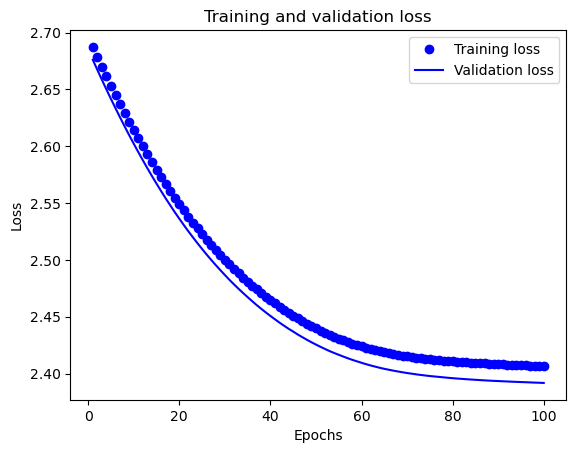

In [32]:
# Listing 4.19 - Plotting the training and validation loss

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

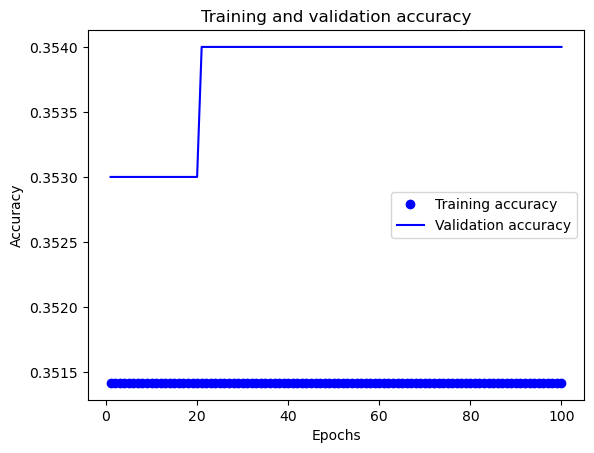

In [33]:
# Listing 4.20 - Plotting the training and validation accuracy 

plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.plot

In [34]:
# Listing 4.21 - Retraining a model from scratch 

model = keras.Sequential([
    layers.Dense(64, activation="relu"), 
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop", 
             loss="categorical_crossentropy", 
             metrics=["accuracy"])
model.fit(x_train, 
         y_train, 
         epochs=9, 
         batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/9
18/18 [==============================] - 1s 16ms/step - loss: 3.7941 - accuracy: 0.2115
Epoch 2/9
18/18 [==============================] - 0s 14ms/step - loss: 3.6415 - accuracy: 0.3517
Epoch 3/9
18/18 [==============================] - 0s 14ms/step - loss: 3.4083 - accuracy: 0.3517
Epoch 4/9
18/18 [==============================] - 0s 14ms/step - loss: 3.1176 - accuracy: 0.3517
Epoch 5/9
18/18 [==============================] - 0s 13ms/step - loss: 2.8185 - accuracy: 0.3517
Epoch 6/9
18/18 [==============================] - 0s 12ms/step - loss: 2.5784 - accuracy: 0.3517
Epoch 7/9
18/18 [==============================] - 0s 12ms/step - loss: 2.4546 - accuracy: 0.3517
Epoch 8/9
18/18 [==============================] - 0s 12ms/step - loss: 2.4210 - accuracy: 0.3517
Epoch 9/9
71/71 [==============================] - 1s 9ms/step - loss: 2.4203 - accuracy: 0.3620


[2.420334577560425, 0.36197686195373535]

In [35]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.1861086375779163

In [36]:
predictions = model.predict(x_test)
predictions[0].shape

71/71 [==============================] - 0s 2ms/step


(46,)

In [37]:
# Listing 4.22 A model with an information bottleneck
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(46, activation='softmax')
])
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(partial_x_train, 
         partial_y_train, 
         epochs=20, 
         batch_size=128, 
         validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 16ms/step - loss: 3.7814 - accuracy: 0.1987 - val_loss: 3.7414 - val_accuracy: 0.2230
Epoch 2/20
63/63 [==============================] - 1s 15ms/step - loss: 3.7055 - accuracy: 0.2603 - val_loss: 3.6676 - val_accuracy: 0.2230
Epoch 3/20
63/63 [==============================] - 1s 14ms/step - loss: 3.6327 - accuracy: 0.3011 - val_loss: 3.5959 - val_accuracy: 0.3540
Epoch 4/20
63/63 [==============================] - 1s 14ms/step - loss: 3.5620 - accuracy: 0.3514 - val_loss: 3.5265 - val_accuracy: 0.3540
Epoch 5/20
63/63 [==============================] - 1s 14ms/step - loss: 3.4937 - accuracy: 0.3514 - val_loss: 3.4592 - val_accuracy: 0.3540
Epoch 6/20
63/63 [==============================] - 1s 13ms/step - loss: 3.4273 - accuracy: 0.3514 - val_loss: 3.3936 - val_accuracy: 0.3540
Epoch 7/20
63/63 [==============================] - 1s 15ms/step - loss: 3.3634 - accuracy: 0.3514 - val_loss: 3.3307 - val_accuracy: 0.3540
Epoch 8/20
63

In [42]:
# Listing 4.23
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_tarrgets) = (boston_housing.load_data())
train_data.shape
test_data.shape
train_targets

57026/57026 [==============================] - 0s 1us/step


array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [43]:
# Listing 4.24
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [48]:
# Listing 4.25

def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

In [49]:
# Listing 4.26

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] #Prepares the validation data: data from partition #k
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate( #Prepares the training data: data from all other partitions
        [train_data[:i + num_val_samples], 
        train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate( 
        [train_targets[:i * num_val_samples], 
        train_targets[(i + 1) * num_val_samples:]], 
        axis = 0)
    model = build_model() #Builds the Keras model
    model.fit(partial_train_data, partial_train_targets, #Trains the model (in silent mode, verbose=0) 
             epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0) #Evaluates the model on the validation data
    all_scores.append(val_mase)

Processing fold #0


ValueError: Data cardinality is ambiguous:
  x sizes: 404
  y sizes: 303
Make sure all arrays contain the same number of samples.